# Follow-Along Activity A

In [1]:
import pandas as pd

data = {
    'Client': [
        'CL1', 'CL2', 'CL3', 'CL4', 'CL5',
        'CL6', 'CL7', 'CL8', 'CL9', 'CL10',
        'CL11', 'CL12', 'CL13', 'CL14', 'CL15',
        'CL16', 'CL17', 'CL18', 'CL19', 'CL20',
        'CL21', 'CL22', 'CL23', 'CL24', 'CL25',
        'CL26', 'CL27', 'CL28', 'CL29', 'CL30'
    ],
    'Annual_Revenue': [
        100, 150, 200, 250, 300,
        350, 400, 420, 430, 450,
        520, 550, 580, 600, 620,
        630, 650, 670, 680, 700,
        720, 740, 750, 780, 800,
        820, 850, 880, 900, 950
    ],
    'Risk_Score': [
        39, 81, 6, 77, 40,
        50, 60, 20, 30, 55,
        25, 35, 45, 50, 60,
        55, 47, 65, 70, 75,
        40, 35, 85, 15, 80,
        90, 10, 25, 95, 5
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows
print(df.head())


  Client  Annual_Revenue  Risk_Score
0    CL1             100          39
1    CL2             150          81
2    CL3             200           6
3    CL4             250          77
4    CL5             300          40


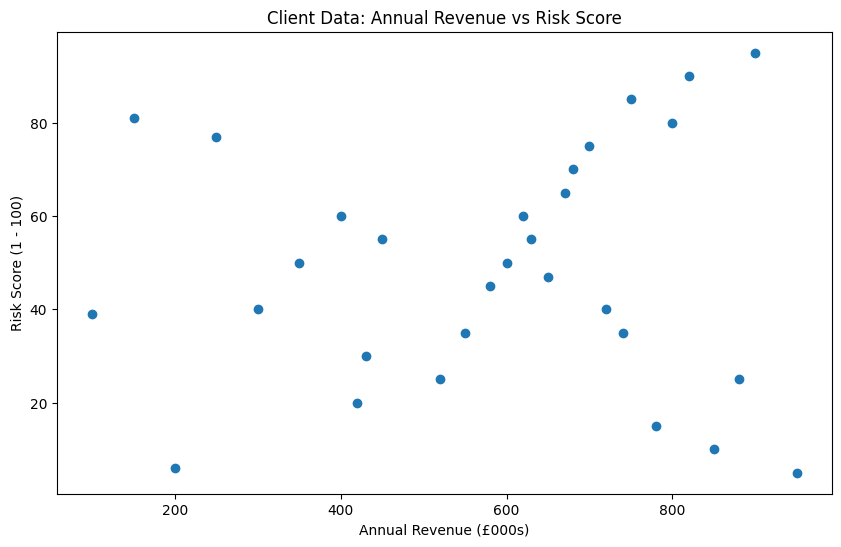

In [2]:
import matplotlib.pyplot as plt

# Scatter plot of the clients
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual_Revenue'], df['Risk_Score'])
plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Data: Annual Revenue vs Risk Score')

# Save as JPEG for textbook publication purposes
plt.savefig('Figure 14.4 Client Data.jpeg', format='jpeg', dpi=300)

plt.show()


In [3]:
from sklearn.cluster import KMeans

# Select features
features = df[['Annual_Revenue', 'Risk_Score']]

# Create the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model and predict clusters
df['Cluster'] = kmeans.fit_predict(features)

print(df)


   Client  Annual_Revenue  Risk_Score  Cluster
0     CL1             100          39        2
1     CL2             150          81        2
2     CL3             200           6        2
3     CL4             250          77        2
4     CL5             300          40        2
5     CL6             350          50        2
6     CL7             400          60        0
7     CL8             420          20        0
8     CL9             430          30        0
9    CL10             450          55        0
10   CL11             520          25        0
11   CL12             550          35        0
12   CL13             580          45        0
13   CL14             600          50        0
14   CL15             620          60        0
15   CL16             630          55        0
16   CL17             650          47        0
17   CL18             670          65        1
18   CL19             680          70        1
19   CL20             700          75        1
20   CL21    

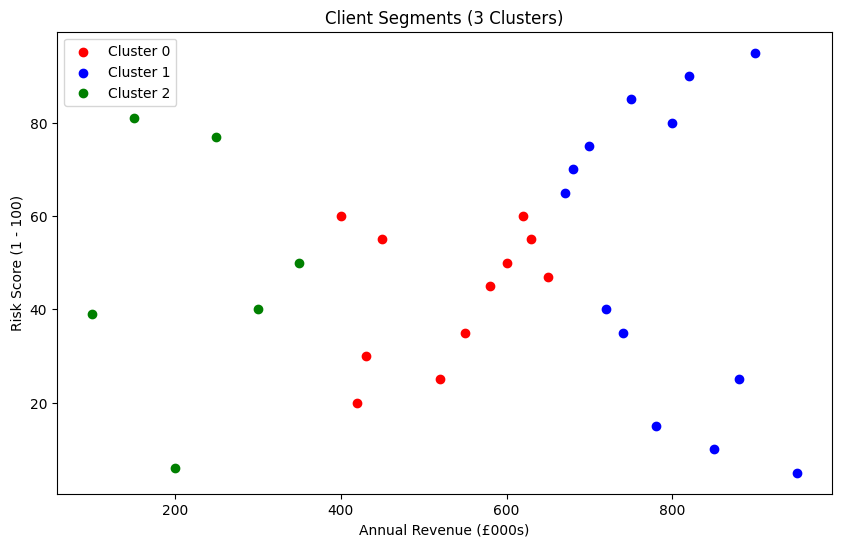

In [4]:
# Plot clustered data points
plt.figure(figsize=(10, 6))

# Custom colour scheme
colors = ['red', 'blue', 'green']

# Loop through each cluster
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual_Revenue'],
        cluster_data['Risk_Score'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segments (3 Clusters)')
plt.legend()

# Save as JPEG for textbook publication purposes
plt.savefig('Figure 14.5 Client Data (3 Clusters).jpeg', format='jpeg', dpi=300)

plt.show()


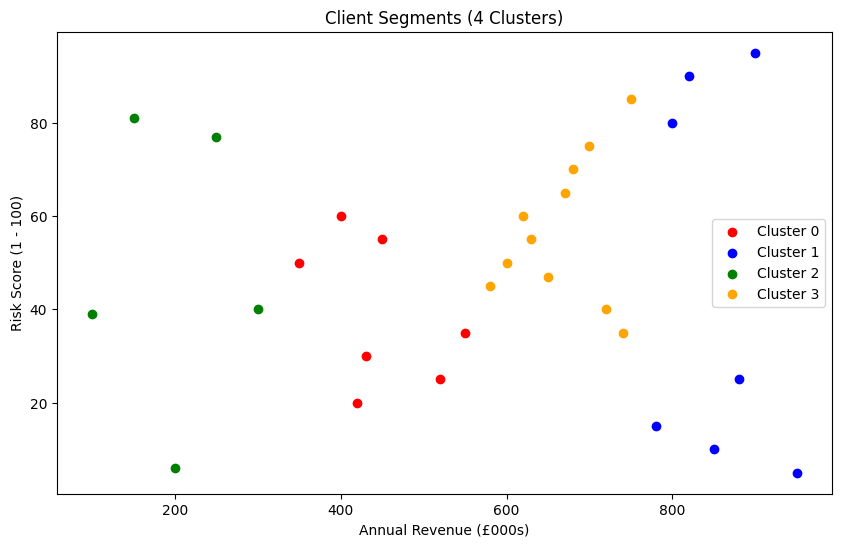

In [5]:
# 4 Clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'orange']

for cluster in range(4):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual_Revenue'],
        cluster_data['Risk_Score'],
        color=colors[cluster],
        label=f'Cluster {cluster}'
    )

plt.xlabel('Annual Revenue (£000s)')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segments (4 Clusters)')
plt.legend()

# Save as JPEG for textbook publication purposes
plt.savefig('Figure 14.6 Client Data (4 Clusters).jpeg', format='jpeg', dpi=300)

plt.show()


# Follow-Along Activity B


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
# Generate a simple synthetic dataset for client segmentation
np.random.seed(42) # Ensures reproducibility
data = {
    'Annual_Income': np.round(np.random.normal(50000, 15000, 2000), 2),
    'Risk_Score': np.round(np.random.normal(50, 10, 2000)).astype(int)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Show the first few rows
print(df.head())


   Annual_Income  Risk_Score
0       57450.71          43
1       47926.04          49
2       59715.33          42
3       72845.45          47
4       46487.70          31


In [8]:
# Create an instance of StandardScaler
# This tool standardises features by removing the mean and scaling to unit variance
scaler = StandardScaler()

# Fit the scaler to the DataFrame 'df' and transform the data
# This scales both 'Annual_Income' and 'Risk_Score' so they have a mean of 0 and standard deviation of 1
scaled_features = scaler.fit_transform(df)


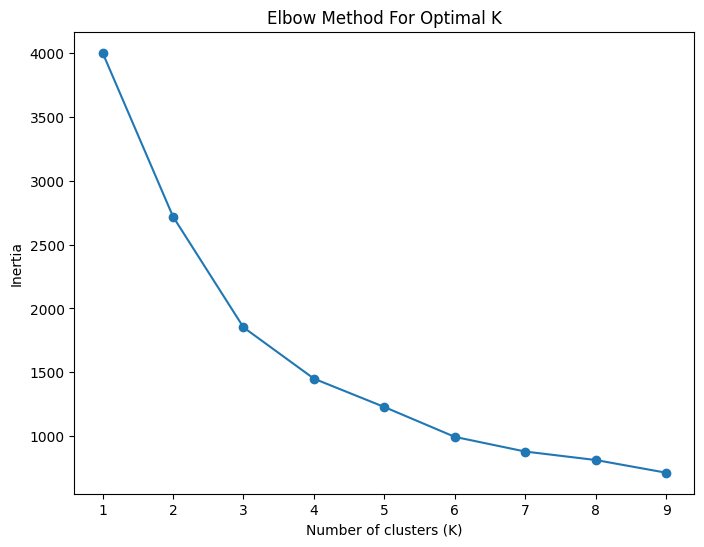

In [9]:
# Create an empty list to store inertia values for each K
inertia = []

# Define a range of K values to test (from 1 to 9 clusters)
K_range = range(1, 10)

# Loop through each K value to fit a KMeans model and calculate inertia
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Create a figure with specified size for the plot
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')

# Saving for textbook publication purpose
plt.savefig('Figure 14.8 Elbow Method For Optimal K.jpeg', format='jpeg', dpi=300)

# Display the plot
plt.show()


In [10]:
# Define the optimal number of clusters (K) based on the elbow method analysis
optimal_k = 3

# Create a KMeans model with the optimal number of clusters and a fixed random_state for reproducibility
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model to the scaled data and predict the cluster for each data point
df['Cluster'] = kmeans.fit_predict(scaled_features)

print(df.head(10))


   Annual_Income  Risk_Score  Cluster
0       57450.71          43        1
1       47926.04          49        0
2       59715.33          42        1
3       72845.45          47        1
4       46487.70          31        1
5       46487.95          52        0
6       73688.19          50        1
7       61511.52          42        1
8       42957.88          57        2
9       58138.40          59        2


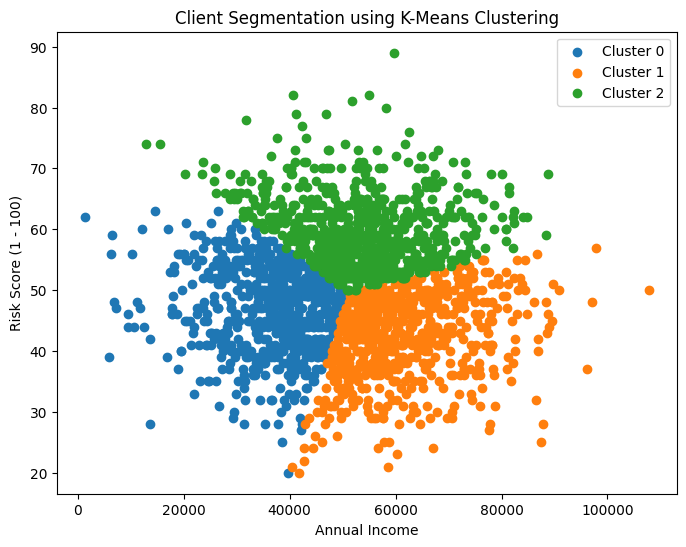

In [11]:
plt.figure(figsize=(8, 6))

for cluster in range(optimal_k):
    subset = df[df['Cluster'] == cluster]
    plt.scatter(subset['Annual_Income'], subset['Risk_Score'], label=f'Cluster {cluster}')

plt.xlabel('Annual Income')
plt.ylabel('Risk Score (1 - 100)')
plt.title('Client Segmentation using K-Means Clustering')
plt.legend()

# Save to jpeg for textbook publication
plt.savefig('Figure 14.9 Client Segmentation.jpeg', format='jpeg', dpi=300)

plt.show()


